In [ ]:
import common_functions as cf

import numpy as np
from skimage.morphology import binary_erosion, binary_dilation, binary_closing,skeletonize, thin
from skimage.measure import find_contours

from skimage import io, color, filters, morphology, measure, exposure
import matplotlib.pyplot as plt
import numpy as np


# de betbawaz el hagat el sh8ala w btshaghal el taht fa 3mltlha comment
def preprocess_image(image, gaussian_blur_size=50, clip_limit=0.03):
    """
    Preprocess an image by normalizing lighting and enhancing contrast.
    
    Parameters:
        image (ndarray): Input image (RGB or grayscale).
        gaussian_blur_size (int): Kernel size for Gaussian blur to normalize lighting.
        clip_limit (float): Clip limit for adaptive histogram equalization.
    
    Returns:
        ndarray: Preprocessed grayscale image with enhanced contrast.
    """
    # Convert to grayscale if the image is RGB
    if len(image.shape) == 3:
        gray = color.rgb2gray(image)
    else:
        gray = image

    # Normalize lighting by subtracting the background illumination
    background = filters.gaussian(gray, sigma=gaussian_blur_size)
    normalized = gray - background
    normalized = (normalized - np.min(normalized)) / (np.max(normalized) - np.min(normalized))

    # Enhance contrast using Adaptive Histogram Equalization
    enhanced = exposure.equalize_adapthist(normalized, clip_limit=clip_limit)

    return enhanced



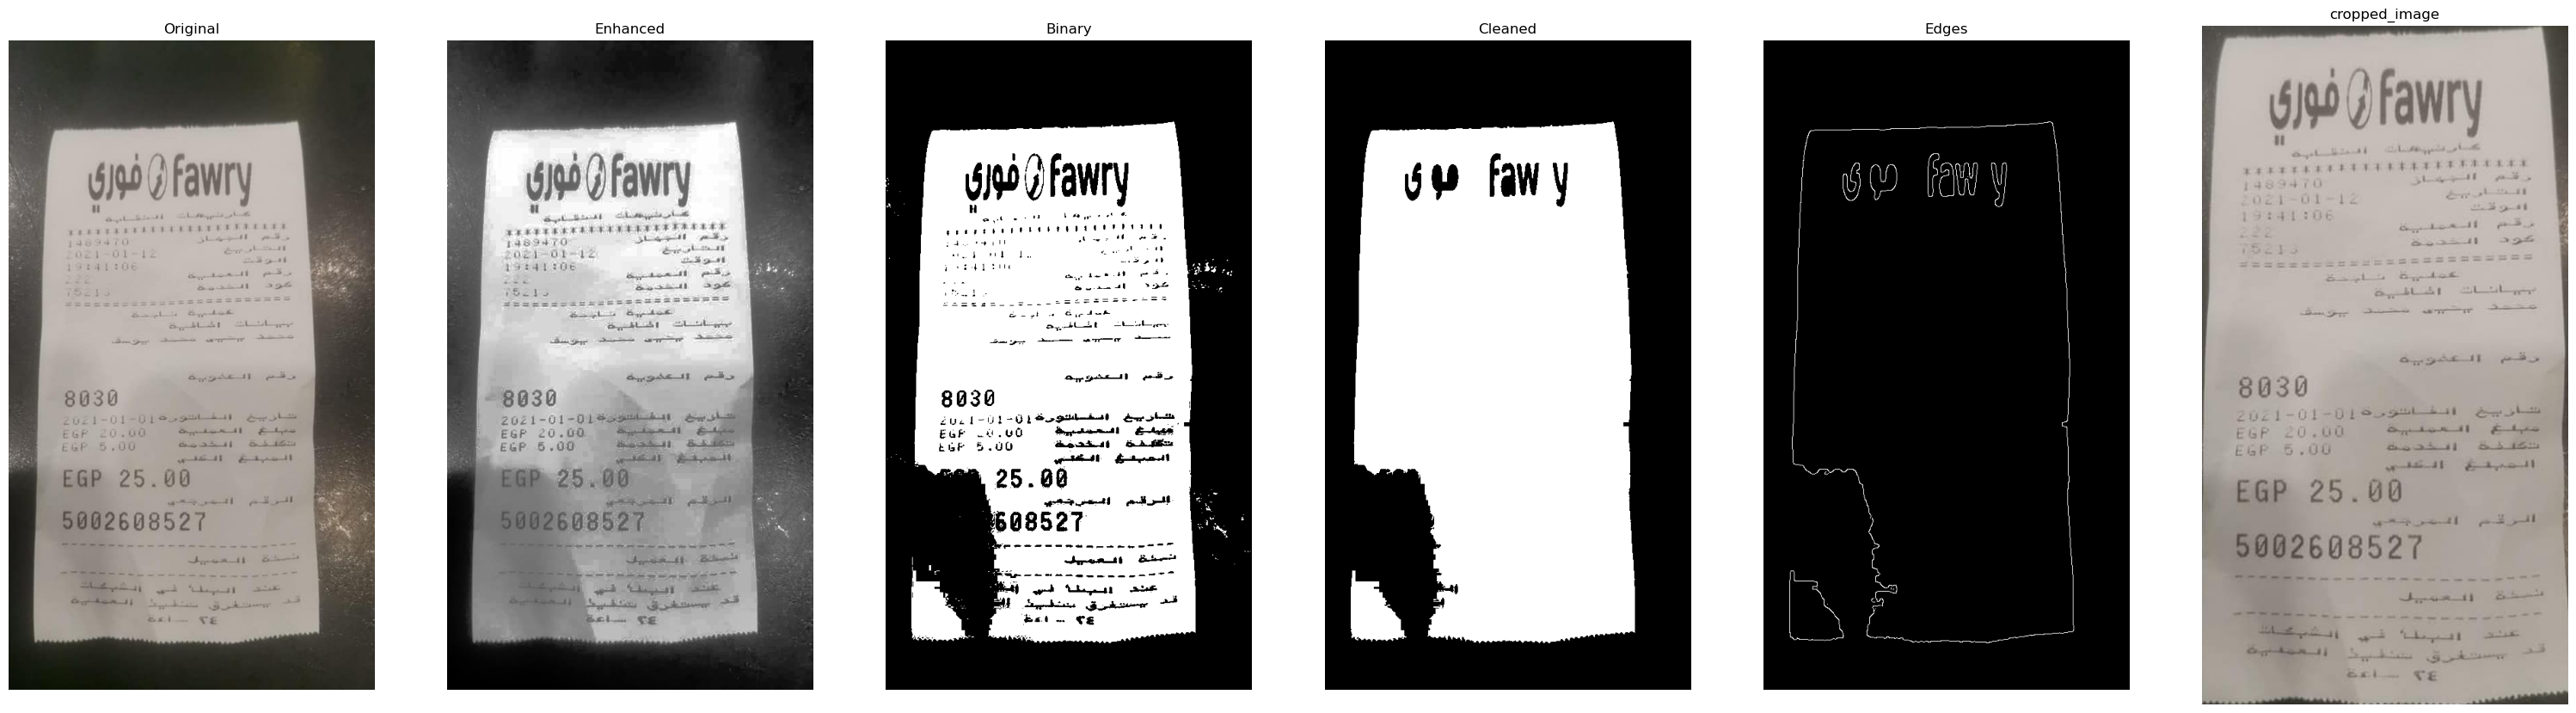

In [114]:
# working images : 1,2,3,4
# not working images : 5,6 ,7 ,8

# Load the image
image = io.imread('imgs/1.jpg')

# Convert to grayscale
gray = cf.rgb2gray(image)

# Enhance contrast using histogram equalization : Histogram bta3et el lab mesh shghala leh ?
enhanced = exposure.equalize_hist(gray)
# enhanced =  preprocess_image(image)

# Apply Otsu's thresholding : will be implemented bas hagarabo 
thresh_val = filters.threshold_otsu(enhanced)
binary = enhanced > thresh_val  # Invert if needed: binary = enhanced <= thresh_val

cleaned = morphology.remove_small_holes(binary, area_threshold=500)
cleaned = morphology.remove_small_objects(cleaned, min_size=500)

# Edge detection
edges = cf.canny(cleaned, sigma=2)

# Find contours
contours = measure.find_contours(cleaned, level=0.5)

# Select the largest contour (assumed to be the receipt)
largest_contour = max(contours, key=lambda x: measure.approximate_polygon(x, tolerance=2).shape[0])

# Get bounding box for the receipt
min_row, min_col = np.min(largest_contour, axis=0)
max_row, max_col = np.max(largest_contour, axis=0) 
# Calculate corrected bounding box
# Crop the receipt using corrected bounding box
#receipt_corrected = image[int(ymin):int(ymax), int(xmin):int(xmax)]

# Crop the receipt
receipt = image[int(min_row):int(max_row), int(min_col):int(max_col)]

cf.show_images([image, enhanced, binary, cleaned, edges,receipt], ['Original', 'Enhanced', 'Binary', 'Cleaned', 'Edges','cropped_image'])
